# Desafio Ordename

### Problema 1 TSP (2-opt solve)

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [85]:
def generate_random_input(n): # generar coordenadas aleatorias en un plano cartesiano
    posicion = np.random.randint(100,size=(n,2))
    grafo = np.array([[np.linalg.norm(posicion[i] - posicion[j])
                                 for i in range(n)]
                                for j in range(n)])
    return posicion, grafo

def plot_route(X, optimal_path): # graficar ruta
    for p1, p2 in zip(optimal_path[:-1], optimal_path[1:]):
        plt.plot([X[p1, 0], X[p2, 0]], [X[p1, 1], X[p2, 1]]);

def cost_change(cost_mat, n1, n2, n3, n4): # funcion cambio de costo
    new_cost     = cost_mat[n1][n3] + cost_mat[n2][n4] # costo nuevo
    current_cost = cost_mat[n1][n2] + cost_mat[n3][n4] # costo actual
    return new_cost - current_cost


def two_opt(route, cost_mat): #algoritmo 2-opt
    path = route
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1: 
                    continue
                if cost_change(cost_mat, path[i - 1], path[i], path[j - 1], path[j]) < 0:
                    path[i:j] = path[j - 1:i - 1:-1]
                    improved = True
        route = path
        #print(route)
    return path

pos,G = generate_random_input(50) # generar coordenadas y grafo con costo de ruta (distancia euclideana)

In [86]:
nodes = len(G)
init_route = list(range(nodes))
print(init_route)
best_route = two_opt(init_route, G)
print(best_route)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[0, 20, 38, 35, 36, 10, 37, 2, 23, 43, 45, 32, 11, 41, 14, 17, 48, 15, 3, 39, 31, 40, 13, 7, 1, 44, 27, 28, 34, 25, 26, 8, 33, 4, 21, 47, 30, 19, 16, 46, 22, 18, 5, 6, 9, 29, 24, 12, 42, 49]


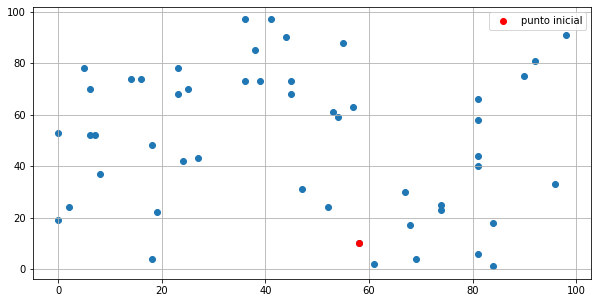

In [90]:
plt.figure(figsize=(10, 5))
plt.scatter(pos[:,0],pos[:,1])
plt.scatter(pos[0,0],pos[0,1],color='red',label='punto inicial')
plt.grid()
plt.legend()

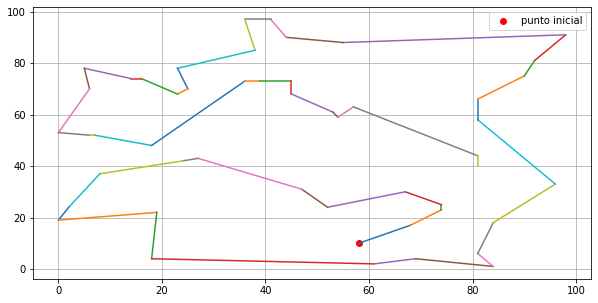

In [92]:
plt.figure(figsize=(10, 5))
plot_route(pos, best_route)
plt.scatter(pos[0,0],pos[0,1],color='red',label='punto inicial')
plt.grid()
plt.legend()

In [62]:
G

array([[ 0.        , 10.44030651, 12.20655562, 50.009999  , 39.84971769],
       [10.44030651,  0.        ,  7.61577311, 40.19950248, 31.76476035],
       [12.20655562,  7.61577311,  0.        , 44.38468204, 38.01315562],
       [50.009999  , 40.19950248, 44.38468204,  0.        , 16.2788206 ],
       [39.84971769, 31.76476035, 38.01315562, 16.2788206 ,  0.        ]])